<h3 align='center'>LINEAR REGRESSION ON SINGLE VARIABLE

### A.K.A **$Univariate Regression$** focuses on determining relationship between one independent variable and one dependant variable

In [461]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [462]:
df=pd.DataFrame({
    'Area':[2600,3000,3200,3600,4000],
    'Price':[5500000,5650000,6100000,6800000,7250000]
})
df

,Area,Price
0,2600,5500000
1,3000,5650000
2,3200,6100000
3,3600,6800000
4,4000,7250000


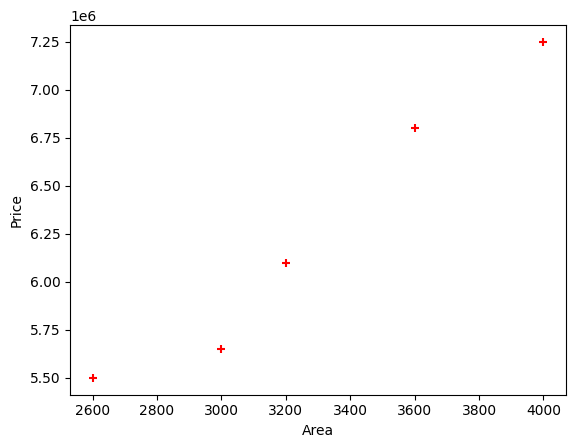

In [463]:
plt.scatter(df['Area'],df['Price'],color='red',marker='+')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [464]:
reg=linear_model.LinearRegression() #Object for linear regression
reg.fit(df[['Area']],df['Price']) #this means you are training the model with the available data points
# df[['Area']] → features (X)
# df['Price'] → target (y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [465]:
reg.predict([[5400]])

d:\Data_Science\data-science\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9138698.63013699])

The equation of a straight line is:

$$
y = mx + c
$$

where:

- $m$ = slope  
- $c$ = y-intercept


The simple linear regression equation is:

$$
\hat{y} = b_0 + b_1 x
$$

where:

- $b_0$ = intercept (value of $\hat{y}$ when $x = 0$)  
- $b_1$ = slope (change in $\hat{y}$ for a one-unit change in $x$)


The slope $b_1$ can also be written as:

$$
b_1 = \frac{\overline{xy} - \overline{x}\,\overline{y}}{\overline{x^2} - (\overline{x})^2}
$$


The intercept $b_0$ is:

$$
b_0 = \bar{y} - b_1 \bar{x}
$$


In [466]:
reg.coef_ #This is the slope(or Gradient)

array([1357.87671233])

In [467]:
reg.intercept_ # This is the value for b(y intercept)

np.float64(1806164.3835616438)

In [468]:
# y=m*x+b 
1357.87671233*5400+1806164.3835616438

9138698.630143642

In [469]:
df1=pd.DataFrame({
    'area':[1200,1500,1700,1750,1900,2100,2300,2500,2700,3000,3300,3700,4000,5500]
})
df1

,area
0,1200
1,1500
2,1700
3,1750
4,1900
5,2100
6,2300
7,2500
8,2700
9,3000


In [470]:
 # .str.strip() is used to remove all the accidental spaces
df1.columns=df1.columns.str.title().str.strip()

In [471]:
df1['Price']=reg.predict(df1[['Area']])
df1

,Area,Price
0,1200,3.435616e+06
1,1500,3.842979e+06
2,1700,4.114555e+06
3,1750,4.182449e+06
4,1900,4.386130e+06
5,2100,4.657705e+06
6,2300,4.929281e+06
7,2500,5.200856e+06
8,2700,5.472432e+06
9,3000,5.879795e+06


In [472]:
reg.predict([[565]])

d:\Data_Science\data-science\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2573364.7260274])

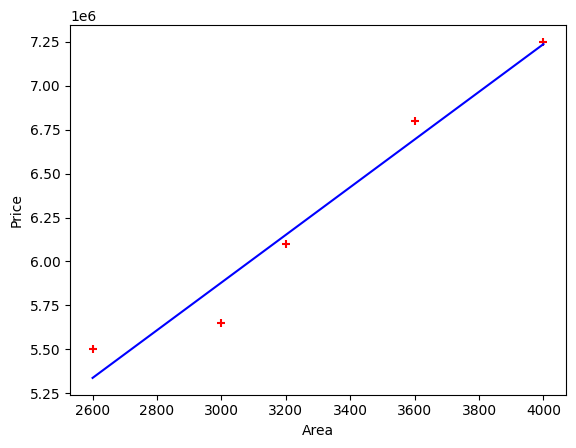

In [473]:
plt.scatter(df['Area'],df['Price'],color='red',marker='+')
plt.plot(df['Area'],reg.predict(df[['Area']]),color='Blue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

<h3 align='center'> LINEAR REGRESSION ON MULTIPLE VARIABLES </h3>

### A.K.A **$Multivariate Regression$** focuses on determining relationship between more than one independent variables and one dependent variable

In [474]:
df2=pd.DataFrame({
    'Area':[2600,3000,3200,3600,4000],
    'Bedrooms':[3,4,np.nan,3,5],
    'Age':[20,15,18,30,8],
    'Price':[550000,565000,610000,595000,760000]
})
df2

,Area,Bedrooms,Age,Price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000



#### Equation for multivariate linear regression :

$$
\hat{y} = b_1 \cdot x_1 + b_2 \cdot x_2 + \cdot \cdot \cdot + b_k \cdot x_k + b_0
$$

#### Equation that can be used here :
$$
price = m_1 \cdot area + m_2 \cdot bedrooms + m_3 \cdot age + b
$$

##### Independent variables : Area, Bedroom, Age
##### Dependent variable : Price

In [475]:
df2.isnull().sum()

Area        0
Bedrooms    1
Age         0
Price       0
dtype: int64

In [476]:
# HANDLE THE MISSING VALUE IN THE BEDROOM COLUMN
df2['Bedrooms']=df2['Bedrooms'].fillna(df2['Bedrooms'].median())
df2

,Area,Bedrooms,Age,Price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.5,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [477]:
reg.fit(df2[['Area','Bedrooms','Age']],df['Price'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [478]:
reg.predict([[4000,5,25]])

d:\Data_Science\data-science\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6496385.96766599])

In [479]:
reg.coef_

array([   1801.93454717, -603759.2214723 ,  -40605.87035002])

- m1 : 1801.93454717
- m2 : -603759.2214723
- m3 : -40605.87035002

In [480]:
reg.intercept_

np.float64(3322590.645110657)

- b : 3322590.645110657

In [481]:
# according to the equation: 
1801.93454717*4000+ -603759.2214723*5+-40605.87035002*25+3322590.645110657
# We've got the same answer as in the answer in which we used the model

6496385.967678657

In [482]:
reg.predict([[10000,8,0]])

d:\Data_Science\data-science\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16511862.34500078])

In [483]:
1801.93454717*10000+-603759.2214723*8+-40605.87035002*0+3322590.645110657

16511862.345032258

In [484]:
reg.predict([[3500,5,10]])

d:\Data_Science\data-science\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6204506.74933291])

In [485]:
reg.predict([[3500,5,0]])

d:\Data_Science\data-science\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6610565.45283315])

### Saving and Loading Models

#### PICKLE

In [486]:
import pickle

##### pickle module allows us to serialize and deserialize the python object into a file and vise versa

In [487]:
with open('model_pickle','wb')as f:
    pickle.dump(reg,f) #linear regression model is saved to reg

This line opens a file named "model_pickle" in write-binary (wb) mode.

"w" → write (create a new file or overwrite)

"b" → binary (required for pickle)

f becomes the file object.

reg → your trained Linear Regression model

pickle.dump() → converts the object into bytes and writes it to file

So the file "model_pickle" now contains your entire trained model.

In [488]:
with open('model_pickle','rb') as f:
    lr=pickle.load(f)

"r" → read the file

"b" → file contains binary data (pickle requires this)

The file object is stored in variable f.

lr = pickle.load(f)

This loads (deserializes) the object stored inside the file.

In [489]:
lr.predict([[5000,5,3]])

d:\Data_Science\data-science\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9191649.66253335])

#### JOBLIB

if your model consist of large number of numpy aray, it is more suitable to use joblib instead of pickle

In [490]:
import joblib

In [491]:
joblib.dump(reg,'model_joblib')

['model_joblib']

In [492]:
lr_joblib=joblib.load('model_joblib')

In [493]:
lr_joblib.predict([[5000,5,3]])

d:\Data_Science\data-science\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9191649.66253335])

### Linear Regression using python

In [494]:
class MyLR:
    def __init__(self):
        self.m=None
        self.b=None
    def fit(self,X_train,y_train):
        num=0
        den=0
        for i in range(X_train.shape[0]):
            num=num+((X_train[i]-X_train.mean())*(y_train[i]-y_train.mean()))
            den=den+((X_train[i]-X_train.mean())*(X_train[i]-X_train.mean()))
        self.m=num/den 
        self.b=y_train.mean()-(self.m*X_train.mean())
        print("m : ",self.m)
        print("b : ",self.b)
    def predict(self,X_test):
        return self.m*X_test+self.b


In [495]:
import numpy as np
import pandas as pd

In [496]:

np.random.seed(42)  # for reproducibility

cgpa = np.round(np.random.uniform(5.0, 9.5, 120), 2)
package = np.round(0.5 * cgpa + np.random.uniform(-1, 1, 120), 2)

df = pd.DataFrame({
    'cgpa': cgpa,
    'package': package
})

df


,cgpa,package
0,6.69,3.96
1,9.28,5.43
2,8.29,3.78
3,7.69,3.07
4,5.70,2.31
...,...,...
115,8.92,4.90
116,8.62,3.87
117,5.84,1.97
118,9.02,4.80


In [497]:
X= df.iloc[:,0].values
y=df.iloc[:,1].values
X

array([6.69, 9.28, 8.29, 7.69, 5.7 , 5.7 , 5.26, 8.9 , 7.71, 8.19, 5.09,
       9.36, 8.75, 5.96, 5.82, 5.83, 6.37, 7.36, 6.94, 6.31, 7.75, 5.63,
       6.31, 6.65, 7.05, 8.53, 5.9 , 7.31, 7.67, 5.21, 7.73, 5.77, 5.29,
       9.27, 9.35, 8.64, 6.37, 5.44, 8.08, 6.98, 5.55, 7.23, 5.15, 9.09,
       6.16, 7.98, 6.4 , 7.34, 7.46, 5.83, 9.36, 8.49, 9.23, 9.03, 7.69,
       9.15, 5.4 , 5.88, 5.2 , 6.46, 6.75, 6.22, 8.73, 6.61, 6.26, 7.44,
       5.63, 8.61, 5.34, 9.44, 8.48, 5.89, 5.02, 8.67, 8.18, 8.28, 8.47,
       5.33, 6.61, 5.52, 8.88, 7.8 , 6.49, 5.29, 6.4 , 6.46, 8.28, 7.87,
       8.99, 7.12, 5.54, 8.21, 8.42, 7.53, 8.47, 7.22, 7.35, 6.92, 5.11,
       5.49, 5.14, 7.86, 6.41, 7.29, 9.08, 6.12, 6.85, 8.4 , 6.03, 5.35,
       6.3 , 5.73, 9.18, 8.64, 7.85, 8.92, 8.62, 5.84, 9.02, 7.43])

In [498]:
y

array([3.96, 5.43, 3.78, 3.07, 2.31, 2.7 , 3.27, 5.17, 2.87, 4.12, 2.38,
       4.12, 3.61, 2.66, 3.8 , 2.56, 3.22, 4.09, 3.2 , 4.1 , 4.8 , 2.32,
       3.15, 2.93, 3.09, 3.34, 3.17, 3.66, 2.94, 2.16, 4.68, 2.36, 1.93,
       4.61, 5.65, 3.8 , 3.53, 3.24, 3.52, 3.95, 2.51, 3.88, 2.84, 4.62,
       2.26, 4.66, 2.84, 3.04, 2.81, 3.1 , 5.04, 3.28, 4.64, 3.97, 4.14,
       3.92, 3.08, 2.71, 3.47, 2.51, 3.06, 2.34, 5.21, 4.06, 2.65, 4.04,
       3.45, 4.42, 2.73, 4.2 , 3.43, 3.74, 3.31, 4.6 , 3.77, 3.84, 4.69,
       3.46, 4.08, 3.32, 4.72, 3.07, 2.57, 3.44, 3.41, 2.25, 3.34, 4.26,
       3.51, 2.88, 2.87, 4.49, 4.51, 3.21, 4.66, 3.08, 3.33, 3.95, 2.85,
       3.44, 2.89, 4.07, 2.39, 3.38, 4.07, 2.55, 4.37, 3.99, 3.8 , 2.94,
       3.74, 2.87, 4.74, 4.31, 3.32, 4.9 , 3.87, 1.97, 4.8 , 3.07])

In [499]:
# X=df[['cgpa']]
# y=df['package']

In [500]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [501]:
X_train.shape


(96,)

In [502]:
X_test.shape

(24,)

In [503]:
X_test[0]


np.float64(7.23)

In [504]:
lr=MyLR()

In [505]:
lr.fit(X_train,y_train)

m :  0.4472940169246086
b :  0.3718059189508667


In [506]:
lr.predict(3.65)

np.float64(2.004429080725688)